# Guided Project: Visualizing Real World Data

- Find a data set to process: a great place to start looking would be [Awesome Public Data Sets](https://github.com/awesomedata/awesome-public-datasets), [Kaggle Data Sets](https://www.kaggle.com/datasets), or the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). A great new source is the [Google dataset search](https://toolbox.google.com/datasetsearch).
- Perform Preliminary Analysis: use functions like `describe` to help guide you to the correct insight and data visualization.
- Using your data, create a minimum of one scatter plot, one histogram, one box plot and one bar graph (you can add more than one visualization of each type of you choose). Graphs should contain the proper labeling of the x and y axis when appropriate as well as a title for the graph.
- Explain what insight or information is inferred from these visualizations. The explanation should be in the notebook in markdown cells.
- Create a data folder containing your data set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('../data/data_p.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,shipmode,sales,quantity,discount,profit,segment,region,state,...,category,orderdate_day,orderdate_weekday,orderdate_month,orderdate_year,shipdate_day,shipdate_weekday,shipdate_month,shipdate_year,preparationtime
0,0,1,First Class,825.174,9,0.30,-117.8820,Corporate,Central,Illinois,...,Furniture,4,Sonntag,9,2016,6,Dienstag,9,2016,2
1,1,2,Standard Class,411.332,4,0.15,-4.8392,Consumer,West,California,...,Furniture,5,Freitag,9,2014,9,Dienstag,9,2014,4
2,2,3,Same Day,411.332,4,0.15,-4.8392,Home Office,West,California,...,Furniture,28,Donnerstag,11,2013,28,Donnerstag,11,2013,0
3,3,4,First Class,241.960,2,0.00,33.8744,Consumer,South,Louisiana,...,Furniture,30,Montag,5,2016,31,Dienstag,5,2016,1
4,4,5,Standard Class,341.960,2,0.00,78.6508,Home Office,East,Rhode Island,...,Furniture,31,Dienstag,12,2013,7,Dienstag,1,2014,7


In [4]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [5]:
data.columns

Index(['shipmode', 'sales', 'quantity', 'discount', 'profit', 'segment',
       'region', 'state', 'subcategory', 'category', 'orderdate_day',
       'orderdate_weekday', 'orderdate_month', 'orderdate_year',
       'shipdate_day', 'shipdate_weekday', 'shipdate_month', 'shipdate_year',
       'preparationtime'],
      dtype='object')

In [6]:
data.describe()

,sales,quantity,discount,profit,orderdate_day,orderdate_month,orderdate_year,shipdate_day,shipdate_month,shipdate_year,preparationtime
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,238.656312,3.807500,0.184523,13.409610,15.644000,7.827500,2014.725500,15.925500,7.771500,2014.740250,3.973500
std,484.803059,2.235216,0.226589,176.418623,8.734148,3.306808,1.126706,8.843868,3.356427,1.133402,1.740705
min,0.444000,1.000000,0.000000,-2929.484500,1.000000,1.000000,2013.000000,1.000000,1.000000,2013.000000,0.000000
25%,17.520000,2.000000,0.000000,-1.965600,8.000000,5.000000,2014.000000,8.000000,5.000000,2014.000000,3.000000
50%,63.479000,3.000000,0.200000,6.215200,16.000000,9.000000,2015.000000,16.000000,9.000000,2015.000000,4.000000
75%,254.545500,5.000000,0.200000,23.652900,23.000000,11.000000,2016.000000,24.000000,11.000000,2016.000000,5.000000
max,9892.740000,14.000000,0.800000,4946.370000,31.000000,12.000000,2016.000000,31.000000,12.000000,2017.000000,7.000000


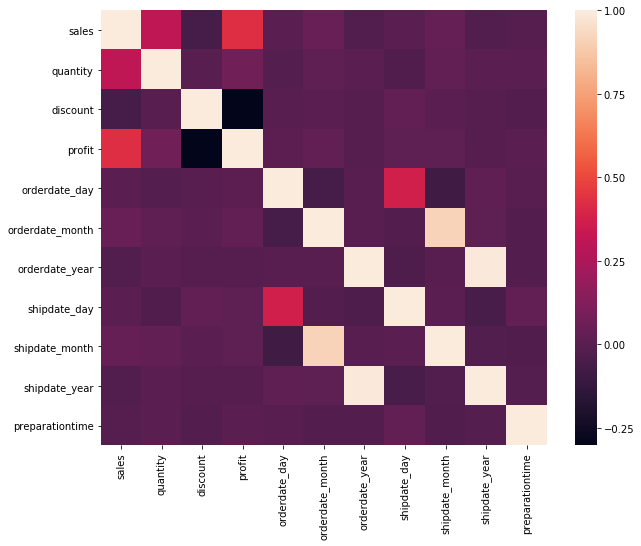

In [7]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr())

# The heatmap shows that there are few fields with correlation. Sales are correlated to quantity and profit 
# which makes sense as the increase in sales will increase the quanties sold and therefore the profit.
# Alos correlated are orderdate_day and shipdate_day; logically, when an order is placed, it will be shipped
# within more or leass the same time frame each time, so the gap between both will be similar each time.

Text(0.5, 1.0, 'Total sales per shipmode')

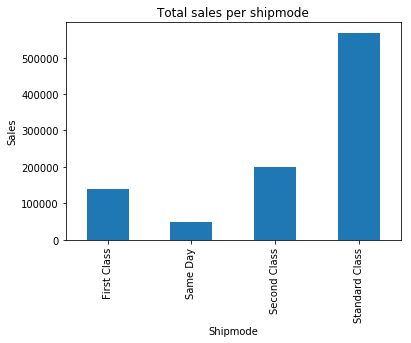

In [8]:
# Bar graph1
data.groupby(['shipmode'])['sales'].sum().plot.bar()
plt.xlabel('Shipmode')
plt.ylabel('Sales')
plt.title('Total sales per Shipmode')

# This grap shows that most of the sales are Standar class shipmode, and very few customers 
# opt for Same Day shippment.

Text(0.5, 1.0, 'Quantity & Sales per shipmode')

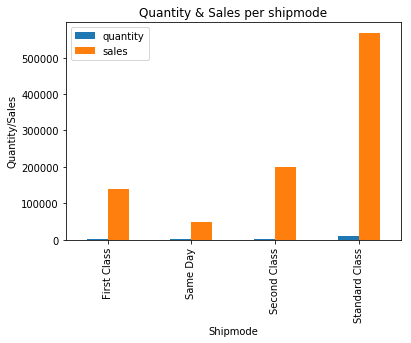

In [20]:
# Bar graph2
data_mean = data[['shipmode', 'quantity', 'sales']].groupby(['shipmode']).agg('sum') 
data_mean.plot.bar()

plt.xlabel('Shipmode')
plt.ylabel('Quantity/Sales')
plt.title('Quantity & Sales per shipmode')

# While sales volume vary a lot per shipping mode, the quanties don't change much. There's a higher volume of 
# quantities for Standard class, same as for the sales; however for all other shipping modes, quanties are 
# at the same level.

Text(0.5, 1.0, 'Quantity vs discount')

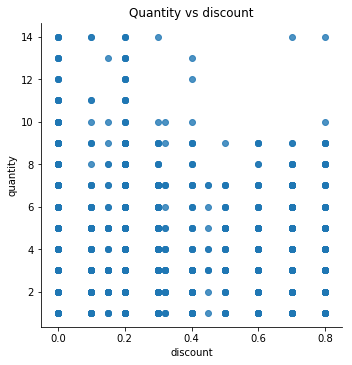

In [52]:
# Scatter plot1
sns.lmplot('discount', 'quantity', data=data, fit_reg=False)
plt.title('Quantity vs discount')

# While we would expect that there might be a correlation between quantities ordered and the discount applied,
# meaning that the more items are ordered, the higher the disount, the scatter plot shows that there's no 
# correlation what so ever. For any volume of quanties, any level of discount can be applied ranging from the
# lowest to the highest.

Text(0.5, 1.0, 'Discount vs quantity per shipmode')

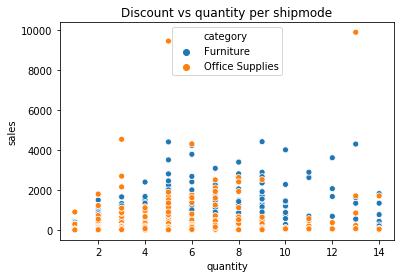

In [51]:
# Scatter plot2
sns.scatterplot(x="quantity", y="sales", hue="category", data=data)
plt.title('Discount vs quantity per shipmode')

# 

Text(0.5, 1.0, 'Discount level per number of orders')

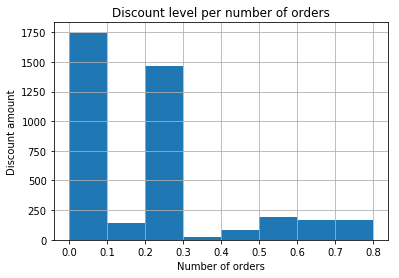

In [40]:
# Histogram
data['discount'].hist(bins=8)
plt.xlabel('Number of orders')
plt.ylabel('Discount amount')
plt.title('Discount level per number of orders')

# The histogram below shows that more than a half of the orders have received a discount; 
# the discount that's applied the most is 20%. Quite a number of orders (approx 200 for each discount) 
# have received also a discount of 50-70%.

In [63]:
print(data[data['discount']==0]['discount'].value_counts())
print(data[data['discount']==0.2]['discount'].value_counts())

0.0    1746
Name: discount, dtype: int64
0.2    1247
Name: discount, dtype: int64


[Text(0, 0, 'First Class'),
 Text(0, 0, 'Standard Class'),
 Text(0, 0, 'Same Day'),
 Text(0, 0, 'Second Class')]

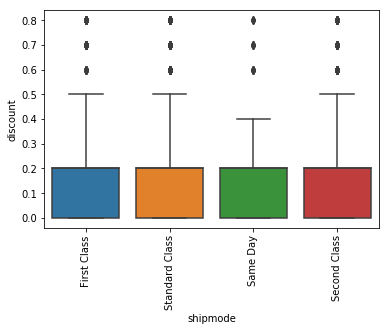

In [46]:
# Box plot 
ax = sns.boxplot(x="shipmode", y="discount", data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# The box plot below shows that there's no difference for discount distribution amongst different shippment modes.
# We see that most of the volume receives a discount between 0-20%.
# We see that the maximum discount for same day shippment is lower than for any other shipping mode, which is 
# logical, as it's the most expensive shippment mode. 
# All of the shippment modes have some outliers with a discount of 60-80%.